5.936622619628906e-05


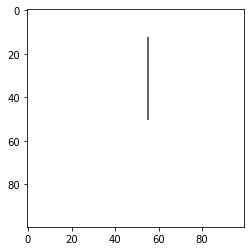

Czas funkcji liniaB wynosi:  0.12482190132141113 sek


NameError: name 'liniaN' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

end = time.time()
print(end - start)

def liniaB(x1, y1, x2, y2):
    data=np.zeros((100,100,3), dtype=np.uint8)
    data.fill(255)
    
#jezeli odcinek jest punktem
    if x1==x2 and y1==y2:
        data[x1,y1]=100
        
    else:
        if x1>x2:
            x1,x2 = x2,x1
            y1,y2 = y2,y1
        dx = x2 - x1
        dy = y2 - y1
        D = 2 * dy - dx
        y = y1
        
        for x in range(x1,x2):
            data[x,y] = 100
            if D > 0:
                y = y + 1
                D = D - 2 * dx
            D = D + 2 * dy
        

            
    plt.imshow(data, interpolation='none', aspect=1)
    plt.show()
    
start = time.time()         
liniaB(51,19,13,55)
end = time.time()
print("Czas funkcji liniaB wynosi: ", end - start , "sek" )
start = time.time()
liniaN(51,19,13,55)
end = time.time()
print("Czas funkcji liniaN wynosi: ", end - start , "sek" )
# liniaB(13,99,55,68)
# liniaB(15,30,37,12)
# liniaB(90,90,0,50)
# liniaN(90,90,0,50)
# time
# liniaB(0,50,90,90)
# liniaB(50,50,50,50)

# liniaN(51,19,13,55)
# liniaN(13,99,55,68)
# liniaN(15,30,37,12)
# liniaN(90,90,0,50)
# liniaN(0,50,90,90)
# liniaN(50,50,50,50)

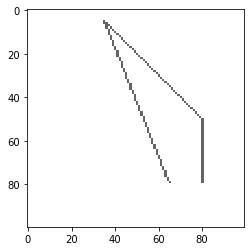

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
data=np.zeros((100,100,3), dtype=np.uint8)
data.fill(255)

def liniaB(x1, y1, x2, y2):
    
    
#jezeli odcinek jest punktem
    if x1==x2 and y1==y2:
        data[x1,y1]=100
        
    else:
        if x1>x2:
            x1,x2 = x2,x1
            y1,y2 = y2,y1
        dx = x2 - x1
        dy = y2 - y1
        D = 2 * dy - dx
        y = y1
        
        for x in range(x1,x2):
            data[x,y] = 100
            if D > 0:
                y = y + 1
                D = D - 2 * dx
            D = D + 2 * dy
            
    plt.imshow(data, interpolation='none', aspect=1)


liniaB(5,35,80,65)
liniaB(50,80,80,65)
liniaB(5,35,50,80)

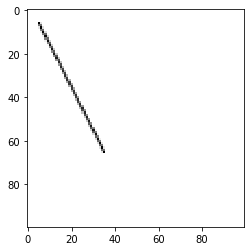

In [3]:
import math
def anti_alias(x1,x2,y1,y2):
    A = (y2-y1)/(x2-x1)
    B = -1
    C = y2 - A*x2

    data = np.zeros((100,100,3),dtype =np.uint8)
    data.fill(255)

    for y in range(max(0,min(y1,y2)),min(max(y1,y2)+1,99)):
        for x in range(min(x1,x2),max(x1,x2)+1):
            d = abs(A*x+ B*y+C)/math.sqrt(A*A+B*B)
            if d<1:
                data [y,x] = 255*d
    plt.imshow(data,interpolation='none')
    
anti_alias(5,35,6,65)

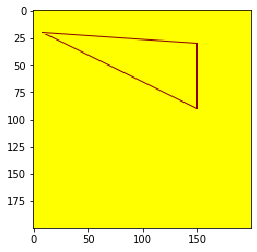

In [34]:
data = np.zeros((200,200,3),dtype =np.uint8)
data[:,:] = [255,255,0]
    
def lineAColor(x1,y1,x2,y2,liniaKolor,tloKolor):
    A = y2-y1
    B = x1-x2
    C = x2*y1 - x1*y2

    

    for y in range(max(0,min(y1,y2)),min(max(y1,y2)+1,99)):
        for x in range(min(x1,x2),max(x1,x2)+1):
            d = abs(A*x+ B*y+C)/math.sqrt(A*A+B*B)
            if d<1:
                data [y,x] =[
                int((liniaKolor[0] * (1-d) +tloKolor[0] * d)),
                int((liniaKolor[1] * (1-d) +tloKolor[1] * d)),
                int((liniaKolor[2] * (1-d) +tloKolor[2] * d))]
                
    plt.imshow(data,interpolation='none')
    
lineAColor(8,20,150,90,[139,0,0],[255,255,0])
lineAColor(150,30,150,90,[139,0,0],[255,255,0])
lineAColor(8,20,150,30,[139,0,0],[255,255,0])




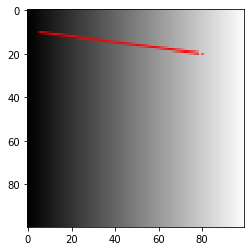

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

def _fpart(x):
    return x - int(x)

def _rfpart(x):
    return 1 - _fpart(x)

def _round(x): 
    return int(np.floor(x+0.5)) 


def putpixel(data, x, y, color, alpha=1.0): 
#     print(data,x, y,color) 
    x = int(x) 
    y = int(y) 
    bg = data [y][x] 
    if(alpha>1.0): 
        alpha=1. 
    color2 = [0.0, 0.0 ,0.0 ] 
    color2[0] = alpha * color[0] + (1.0 - alpha) *bg[0] 
    color2[1] = alpha * color[1] + (1.0 - alpha) *bg[1] 
    color2[2] = alpha * color[2] + (1.0 - alpha) *bg[2] 
    data[y, x] = color2
    
def drawXWline(x1, y1, x2, y2, color):
# def lineXWcolor(data, x1, y1, x2, y2, color):
    
    data = np.zeros((100,100,3),dtype =np.uint8)
    for i in range(100):
        data[:, i] = i*255/100
    dx = x2 - x1
    dy = y2 - y1
    steep = abs(dx) < abs(dy)
    
    if steep:
        x1, y1, x2, y2, dx, dy = y1, x1, y2, x2, dy, dx
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1

    gradient = dy/dx
    
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1+0.5)
    xpxl1 = xend
    ypxl1 = math.floor(yend)
    
    if steep:
        putpixel(data,ypxl1, xpxl1, color, _rfpart(yend) * xgap)
        putpixel(data,ypxl1+1,xpxl1,color, _fpart(yend)*xgap)
    else:
        putpixel(data,xpxl1, ypxl1, color, _rfpart(yend) *xgap) 
        putpixel(data,xpxl1,ypxl1+1,color, _fpart(yend)*xgap)
    
    intery = yend + gradient
    xend = round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _rfpart(x2+0.5)
    xpxl2 = xend
    ypxl2 = math.floor(yend)
    
    if steep:
        putpixel(data,ypxl2, xpxl2, color, _rfpart(yend) * xgap)
        putpixel(data,ypxl2+1, xpxl2, color, _fpart(yend) * xgap)
    else:
        putpixel(data,xpxl2, ypxl2, color, _rfpart(yend) * xgap)
        putpixel(data,xpxl2, ypxl2+1, color, _fpart(yend) * xgap)
        
    if steep:
        for x in range( xpxl1 + 1, xpxl2 -1): 
            putpixel(data,math.floor(intery), x, color, _rfpart(intery))
            putpixel(data,math.floor(intery) + 1, x, color, _fpart(intery))
            intery = intery + gradient
    else:
        for x in range( xpxl1 + 1, xpxl2 -1): 
            putpixel(data,x, math.floor(intery), color, _rfpart(intery))
            putpixel(data,x, math.floor(intery) + 1, color, _fpart(intery))
            intery = intery + gradient
    plt.imshow(data,interpolation='none')
    
data = np.zeros((100,100,3),dtype =np.uint8)
# plt.imshow(data,interpolation='none')

# print(data)
# lineXWcolor(data,1,10,15,20,[139,0,0])
drawXWline(5,10,80,20,[255,0,0])



